In [68]:
## News Classfication Project By using NLP 

In [138]:
#Import libraries and load the data
import pandas as pd 
import numpy as np

train_df=pd.read_csv('train.csv', header=None, skiprows=1)
test_df=pd.read_csv('test.csv',header=None)

In [139]:
train_df.head(5)

,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [140]:
print(train_df.shape)

(120000, 3)


In [141]:
test_df.head(5)

,0,1,2
0,Class Index,Title,Description
1,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
2,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
3,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
4,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...


In [142]:
print(test_df.shape)

(7601, 3)


In [143]:
# Assign proper column names
train_df.columns = ["label", "title", "description"]
test_df.columns = ["label", "title", "description"]

In [144]:
print(train_df1.columns)

Index(['label', 'title', 'description'], dtype='object')


In [145]:
##Convert label to integer:
train_df['label'] = train_df['label'].astype(int)


In [146]:
#Map numeric labels to category names

label_mapping = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_df['label_name'] = train_df['label'].map(label_mapping)


In [147]:
# Combine text features (Title + Description)
train_df["text"] = train_df["title"] + " " + train_df["description"]
test_df["text"] = test_df["title"] + " " + test_df["description"]


In [148]:
print(train_df['text'][1])

Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.


In [149]:
train_df['text'].isnull().sum()

0

In [150]:
test_df['text'].isnull().sum()

0

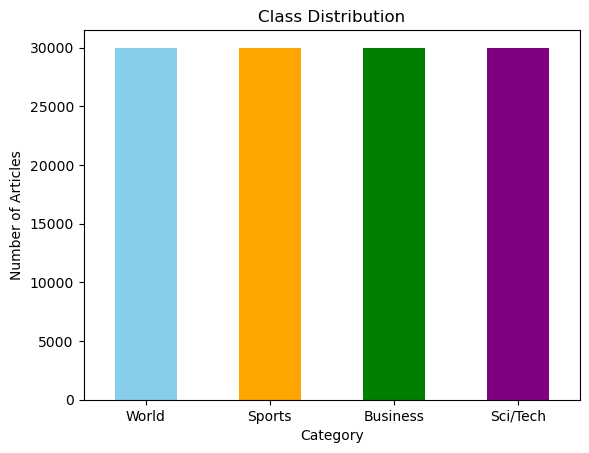

In [151]:
#Create Class Distribution Chart:
import matplotlib.pyplot as plt

category_order = ["World", "Sports", "Business", "Sci/Tech"]

counts = train_df['label_name'].value_counts().reindex(category_order).fillna(0)

counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()


In [153]:
#Preprocess the Text
import re
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-z\s]', '',text)  #keep only letters
    words=text.split()
    words=[word for word in words if word not in stop_words]
    return " ".join(words)

train_df['clean_text']=train_df['text'].apply(clean_text)
test_df['clean_text']=test_df['text'].apply(clean_text)


In [154]:
train_df['clean_text']

0         wall st bears claw back black reuters reuters ...
1         carlyle looks toward commercial aerospace reut...
2         oil economy cloud stocks outlook reuters reute...
3         iraq halts oil exports main southern pipeline ...
4         oil prices soar alltime record posing new mena...
                                ...                        
119995    pakistans musharraf says wont quit army chief ...
119996    renteria signing topshelf deal red sox general...
119997    saban going dolphins yet miami dolphins put co...
119998    todays nfl games pittsburgh ny giants time pm ...
119999    nets get carter raptors indianapolis allstar v...
Name: clean_text, Length: 120000, dtype: object

In [155]:
print(train_df['label'].unique())

[3 4 2 1]


In [156]:
# split the data
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    train_df['clean_text'], train_df['label'], test_size=0.2, random_state=42
)

In [157]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

In [158]:
#Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model=LogisticRegression(max_iter=200)
model.fit(X_train,y_train)


LogisticRegression(max_iter=200)

In [159]:
y_pred=model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

class_names = ["World", "Sports", "Business", "Sci/Tech"]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy Score: 0.9067

Classification Report:
              precision    recall  f1-score   support

       World       0.92      0.89      0.91      5956
      Sports       0.95      0.98      0.96      6058
    Business       0.87      0.88      0.87      5911
    Sci/Tech       0.89      0.88      0.88      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



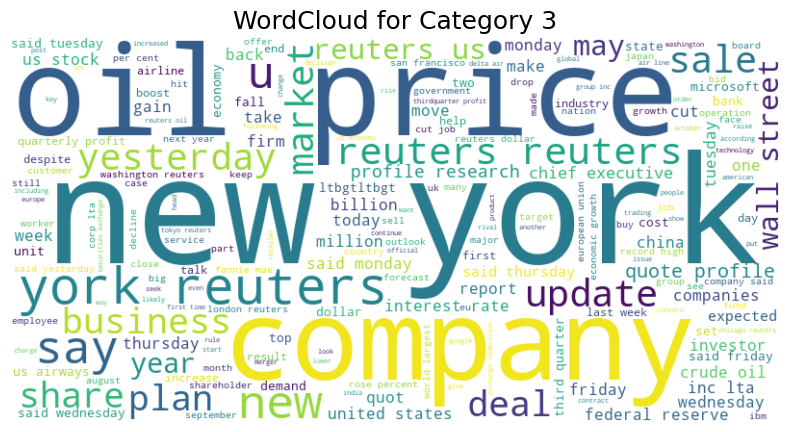

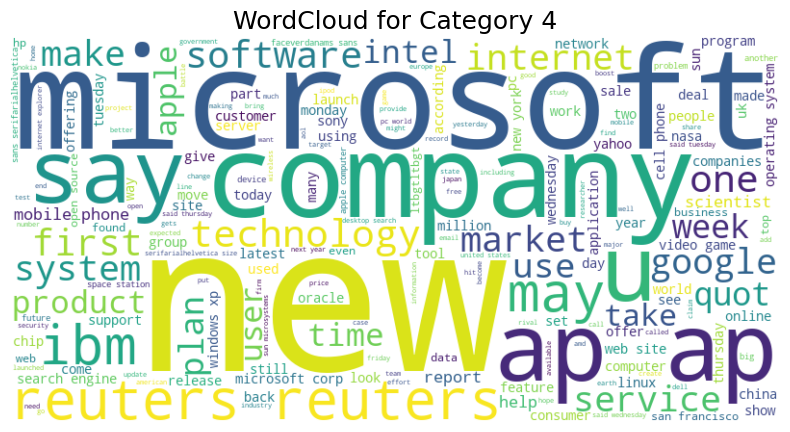

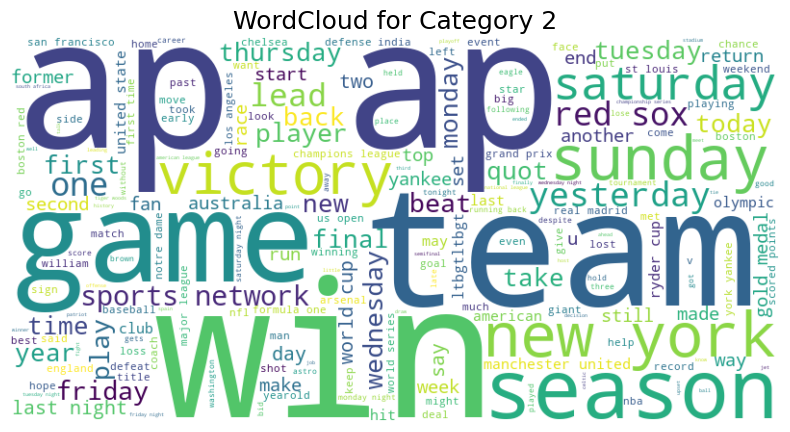

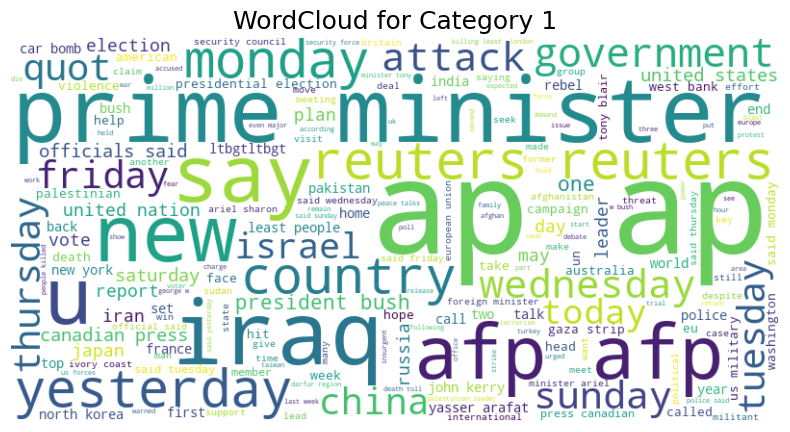

In [161]:
#Generate WordCloud per Category
categories = train_df['label'].unique()

for cat in categories:
    text_cat = " ".join(train_df[train_df['label'] == cat]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_cat)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Category {cat}", fontsize=18)
    plt.show()


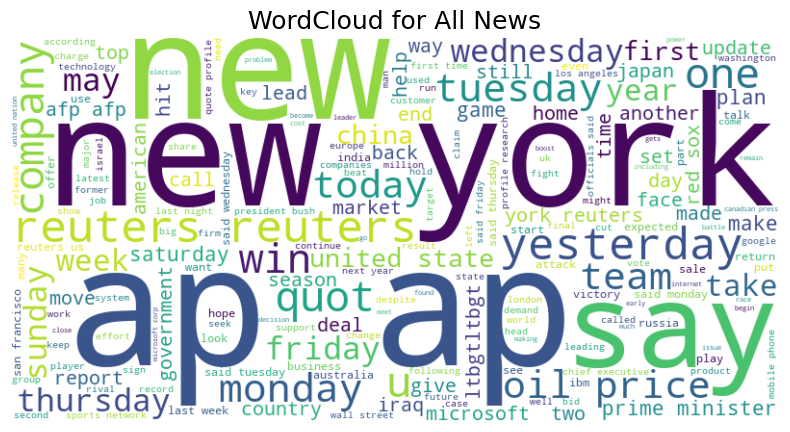

In [163]:
#Generate a WordCloud for All Text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into one string
all_text = " ".join(train_df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for All News", fontsize=18)
plt.show()


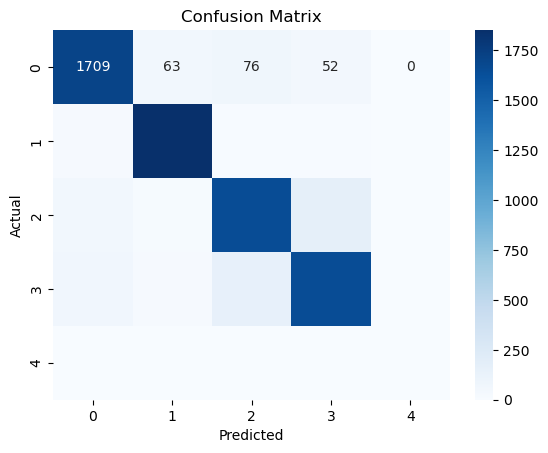

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
